In [121]:
import pandas as pd
import numpy as np
import json
import seaborn as sns


In [122]:
with open('primed_qtable.json', 'r') as file:
    data = json.load(file)

In [123]:
data_df = pd.DataFrame(data)
data_df

,0,1,2,3,4,5,6
0,0.881324,0.557594,0.445953,0.893804,0.462050,0.939177,0.236614
1,0.247962,0.368858,0.438123,0.510207,0.743162,0.211438,0.087415
2,0.355466,0.830689,0.725985,0.095900,0.194237,0.593492,0.133877
3,0.418130,0.630107,0.113688,0.583956,0.554985,0.489120,0.672114
4,0.170792,0.220817,0.128859,0.666348,0.389534,0.239401,0.722215
...,...,...,...,...,...,...,...
86523,0.634083,0.114913,0.429055,0.853965,0.921588,0.647791,0.529571
86524,0.238156,0.837181,0.868281,0.299513,0.204562,0.856786,0.602941
86525,0.447126,0.435546,0.732776,0.445193,0.782455,0.233458,0.836132
86526,0.623226,0.458272,0.770937,0.840741,0.488062,0.685930,0.299340


In [127]:
import pickle
granularity = 4.0
HEIGHT= int(26*granularity)
WIDTH = int(26*granularity)
def load_qtable(filename="qtable.pkl"):
    with open(filename, "rb") as f:
        qtable = pickle.load(f)
    return qtable

q_table = load_qtable()

In [128]:
q_table

,0,1,2,3,4,5,6
0,0.881324,0.557594,0.445953,0.893804,0.462050,0.939177,0.236614
1,0.247962,0.368858,0.438123,0.510207,0.743162,0.211438,0.087415
2,0.355466,0.830689,0.725985,0.095900,0.194237,0.593492,0.133877
3,0.418130,0.630107,0.113688,0.583956,0.554985,0.489120,0.672114
4,0.170792,0.220817,0.128859,0.666348,0.389534,0.239401,0.722215
...,...,...,...,...,...,...,...
86523,0.634083,0.114913,0.429055,0.853965,0.921588,0.647791,0.529571
86524,0.238156,0.837181,0.868281,0.299513,0.204562,0.856786,0.602941
86525,0.447126,0.435546,0.732776,0.445193,0.782455,0.233458,0.836132
86526,0.623226,0.458272,0.770937,0.840741,0.488062,0.685930,0.299340


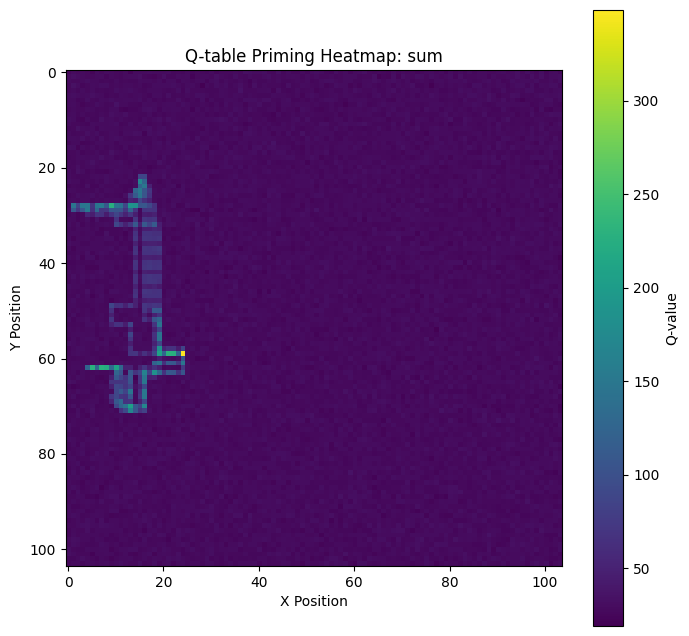

In [129]:
import numpy as np
import matplotlib.pyplot as plt

def plot_qtable_heatmap(qtable, mode="sum"):
    collapsed = np.zeros((HEIGHT, WIDTH))

    #encoding: ((((x,y)*2 + cart)*2 + items)*2 + checkout)

    for x in range(HEIGHT):
        for y in range(WIDTH):
            cell_value = 0
            # binary has_cart
            for cart in [0, 1]:
                # binary has_items
                for items in [0, 1]:
                    # binary has_checkour
                    for checkout in [0, 1]:
                        idx = ((((x*HEIGHT + y)*2 + cart)*2 + items)*2 + checkout)

                        if mode == "sum":
                            cell_value += qtable.loc[idx].sum() #sum of actions
                        elif mode == "max":
                            cell_value += qtable.loc[idx].max() #max of actions
                        else:
                            raise ValueError("mode wrong")

            collapsed[x, y] = cell_value

    plt.figure(figsize=(8, 8))
    plt.imshow(collapsed.T, origin="lower", aspect="equal")
    plt.colorbar(label="Q-value")
    
    ax = plt.gca()
    ax.invert_yaxis()

    plt.title(f"Q-table Priming Heatmap: {mode}")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.show()

plot_qtable_heatmap(qtable=q_table, mode="sum")


In [130]:
append()

NameError: name 'append' is not defined

In [ ]:
def max_heatmap_cell(qtable, mode="sum"):
    collapsed = np.zeros((HEIGHT, WIDTH))

    # compute collapsed heatmap \
    for x in range(HEIGHT):
        for y in range(WIDTH):
            cell_value = 0
            for cart in [0, 1]:
                for items in [0, 1]:
                    for checkout in [0, 1]:
                        idx = ((((x*HEIGHT + y)*2 + cart)*2 + items)*2 + checkout)

                        if mode == "sum":
                            cell_value += qtable.loc[idx].sum()
                        elif mode == "max":
                            cell_value += qtable.loc[idx].max()
                        else:
                            raise ValueError("mode wrong")

            collapsed[x, y] = cell_value

    max_flat_idx = np.argmax(collapsed)
    max_x, max_y = np.unravel_index(max_flat_idx, collapsed.shape)
    max_value = collapsed[max_x, max_y]

    print("\n=== Highest Heatmap Cell ===")
    print(f"Location: (x={max_x}, y={max_y})")
    print(f"Collapsed Value: {max_value:.4f}\n")

    print("=== Q-values for all substates within this cell ===")
    for cart in [0, 1]:
        for items in [0, 1]:
            for checkout in [0, 1]:
                idx = ((((max_x*HEIGHT + max_y)*2 + cart)*2 + items)*2 + checkout)
                qvals = qtable.loc[idx].values
                qvals = np.array(qvals, float)
                print(f"State (cart={cart}, items={items}, checkout={checkout}) → idx={idx}")
                print(f"  Q-values: {qvals}")
                print()

max_heatmap_cell(q_table)



=== Highest Heatmap Cell ===
Location: (x=18, y=44)
Collapsed Value: 406.6979

=== Q-values for all substates within this cell ===
State (cart=0, items=0, checkout=0) → idx=11584
  Q-values: [0.11818136 0.3185464  0.25814111 0.42981449 0.61528318 0.12692476
 0.74672538]

State (cart=0, items=0, checkout=1) → idx=11585
  Q-values: [0.11880115 0.67730022 0.16128984 0.00686139 0.40295144 0.24184521
 0.58672542]

State (cart=0, items=1, checkout=0) → idx=11586
  Q-values: [0.46887724 0.73960433 0.09383584 0.81551286 0.20252072 0.82541516
 0.90562571]

State (cart=0, items=1, checkout=1) → idx=11587
  Q-values: [0.96991795 0.28159533 0.87936375 0.74003129 0.15646547 0.70118944
 0.94447076]

State (cart=1, items=0, checkout=0) → idx=11588
  Q-values: [5.65372454e-01 1.20592354e+02 5.87988610e-01 2.04854185e+01
 8.40291976e-02 4.32953053e-01 1.00577448e+02]

State (cart=1, items=0, checkout=1) → idx=11589
  Q-values: [0.68229325 0.02930988 0.58861334 0.09198613 0.25589903 0.77272472
 0.49783